In [26]:
import cv2
import numpy as np
import matplotlib.pyplot as plt 

(360, 360, 3)


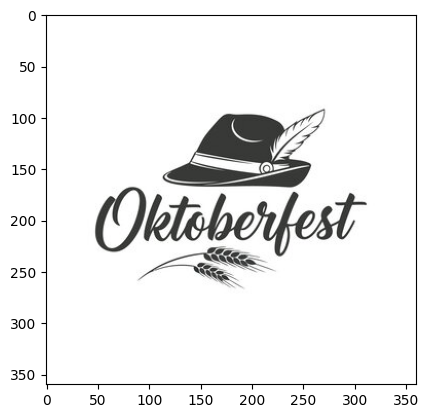

In [27]:
imgOktober = cv2.imread("Oktoberfest.jpg", 1)#[:,:,::-1]
print(imgOktober.shape)
plt.imshow(imgOktober)

(1800, 1800, 3)


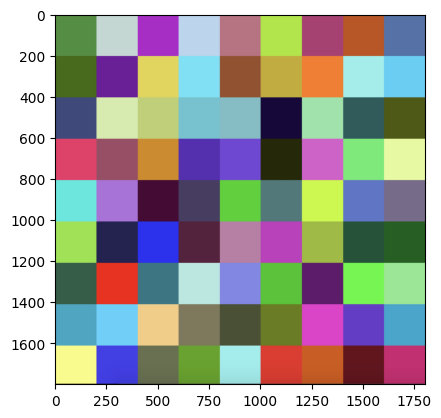

In [28]:
imgBackgr = cv2.imread("checkerboard_color.png", 1)[:,:,::-1]
print(imgBackgr.shape)
plt.imshow(imgBackgr)

In [29]:
ratio = imgOktober.shape[0] / imgBackgr.shape[1]
dim = (imgOktober.shape[0], int(imgBackgr.shape[0] * ratio))
print(dim)

(360, 360)


(360, 360, 3)


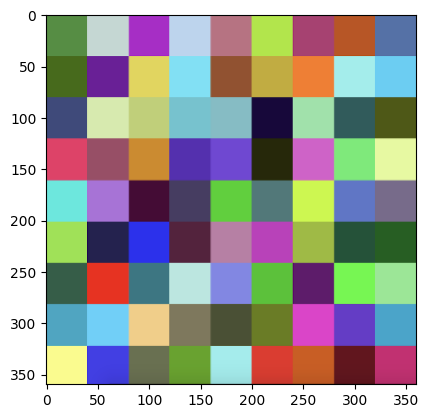

In [30]:
imgBackgrResize = cv2.resize(imgBackgr, dim)
print(imgBackgrResize.shape)
plt.imshow(imgBackgrResize)

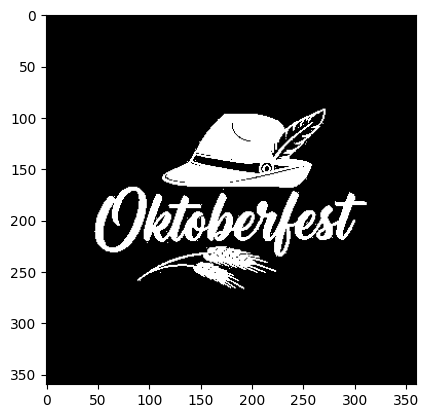

In [31]:
oktoberGray = cv2.cvtColor(imgOktober, cv2.COLOR_BGR2GRAY)
oktoberMask = cv2.threshold(oktoberGray, 240, 255, cv2.THRESH_BINARY_INV)[1]
plt.imshow(oktoberMask, cmap='gray')

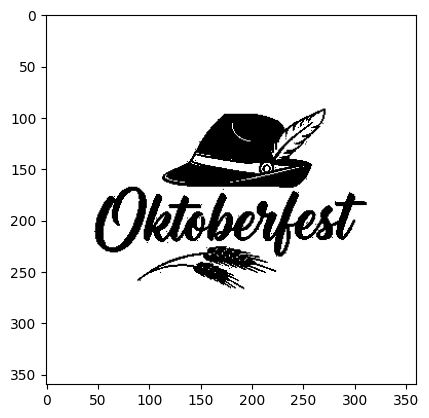

In [32]:
oktoberMaskInv = cv2.bitwise_not(oktoberMask)
plt.imshow(oktoberMaskInv, cmap='gray')

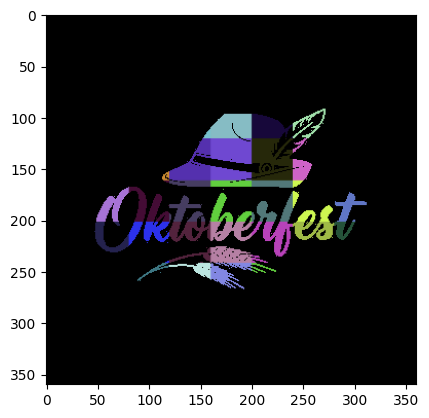

In [33]:
onlyBackgr = cv2.bitwise_and(imgBackgrResize, imgBackgrResize, mask=oktoberMask)
plt.imshow(onlyBackgr)

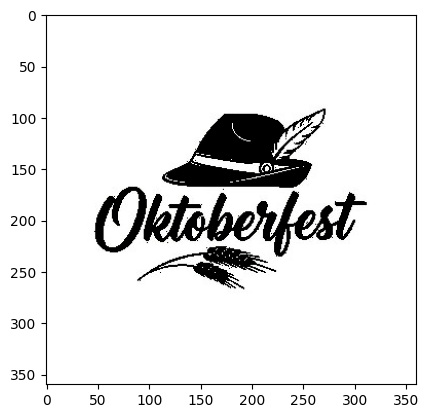

In [34]:
onlyForegr = cv2.bitwise_and(imgOktober, imgOktober, mask=oktoberMaskInv)
plt.imshow(onlyForegr)

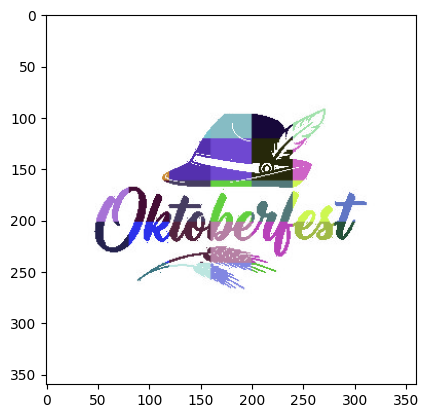

In [35]:
resOktober = cv2.add(onlyBackgr, onlyForegr)
plt.imshow(resOktober)